In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Automation Project

## What's the data look like?

In [4]:
df = pd.read_csv('analysis-mini-project.csv')

In [5]:
df.head()

,automation_id,date_automation_created,trigger,action,automation_status,user_id,date_user_created,workspace_id,date_workspace_created,workspace_plan
0,f685875a-124c-43ca-b929-0df11a7dba99,2020-07-14 12:15:48+00,status,comment,True,11461344,2020-07-14 10:21:18+00,11148888,2020-07-14 10:22:31+00,Free
1,1c4f6365-3925-4a2a-9f91-6eca53246298,2020-07-12 08:20:45+00,unblocked,status,True,13967127,2020-06-16 15:01:59+00,7675332,2020-06-16 15:04:18+00,Business
2,2b290c50-8ba9-4feb-a5d3-5038f0d189ca,2020-07-14 12:20:44+00,status,assignee,True,13934415,2020-06-07 09:19:49+00,7658208,2020-06-07 09:25:29+00,Professional
3,864b0b76-718b-40e9-8819-a9b38830ca7c,2020-06-19 07:53:44+00,status,create_task,True,13975383,2020-06-18 17:39:32+00,7680045,2020-06-18 17:48:07+00,Professional
4,e42e4bb1-f59f-446e-a34b-437eb1ecb481,2020-07-28 18:51:30+00,task_created,custom_field,True,19066443,2020-06-04 21:23:23+00,7163400,2020-06-04 21:27:50+00,Business


In [6]:
df.size

280600

In [185]:
df.user_id.nunique()

4482

In [226]:
# adding column for analysis later
df['time_to_first_auto'] = pd.to_datetime(df['date_automation_created'])-pd.to_datetime(df['date_workspace_created'])

In [14]:
grouped_user = df.groupby('user_id')

In [16]:
df['user_id'].nunique()

4482

# Questions to answer:

## How common is it for users to create automations?  

In [21]:
first_auto = grouped_user['date_automation_created'].min()

In [70]:
users = grouped_user['automation_id'].count().describe()
users

count    4482.000000
mean        6.260598
std        21.223014
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       700.000000
Name: automation_id, dtype: float64

If we're assuming there are 220,000 users, then only 2% of them have ever created an automation. If it turns out that using automations drives conversion from the free tier to a paid tier, we should probably focus some effort on getting people on the free tier to start using automations. 

The vast majority (88%) of users who do use automations create between 1 and 10 automations. Only 24 users have created more than 100 automations, and the max amount of automations created is 700. The 75th %ile of users are creating only 5 automations. 

## Do most workspaces use automations?

In [71]:
grouped_work = df.groupby('workspace_id')
grouped_work['automation_id'].count().describe()

count    4198.000000
mean        6.684135
std        24.512892
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       833.000000
Name: automation_id, dtype: float64

If we're assuming there are 150,000 workspaces, then only 2.8% of them are using automations. Again, the vast majority of them have between 1 and 10 automations (see plot below).

<AxesSubplot:ylabel='Frequency'>

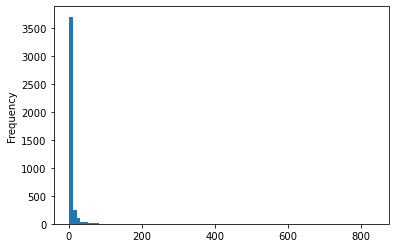

In [72]:
grouped_work['automation_id'].count().plot(kind='hist', bins = 80)

In [228]:
more_10 = grouped_work['automation_id'].count()>10
more_10.value_counts()

False    3669
True      529
Name: automation_id, dtype: int64

The numbers for workspaces are predictably similar, with 3669/4198 workspaces having fewer than 10 automations, and the median number of automations per workspace being 2. The max number of automations per workspace is 833, but only 24 of our 4198 have more than 100. 

In [186]:
grouped_work['automation_status'].value_counts().max()
# the account that created 833 automations has only deactivated 2 of them

831

## Once people find out about automations, do they like them?

In [96]:
df[df['automation_status']==True]['workspace_id'].nunique()

4014

In [94]:
df['workspace_id'].nunique()

4198

4014 of our 4198 workspaces have active automations - that seems like a pretty good rate of adoption, ie. users who begin using automations tend to continue using them.  

## What triggers and actions are most common?

In [98]:
df[df['automation_status']==True]['trigger'].value_counts()

task_appeared            8658
status                   6915
task_created             3781
custom_field             2422
on_due_date              1694
subcategory_id            656
on_start_date             540
subtasks_resolved         507
checklists_resolved       277
unblocked                 271
assignee                  185
due_date                  153
priority                  110
time_spent                 57
start_date                 53
pr_merged                  39
pr_linked                  18
branch_linked              18
assignee_removed           11
pr_change_requested        11
webhook                     8
linked_task                 3
error_event_frequency       2
commit_linked               2
on_commit                   2
exception                   1
project_spiking             1
branch_merged               1
Name: trigger, dtype: int64

In [99]:
df[df['automation_status']==True]['action'].value_counts()

assignee            8995
status              3834
custom_field        3010
add_follower        2075
subcategory         1752
due_date            1149
comment             1040
priority             930
change_tags          885
apply_template       562
create_task          551
start_date           405
copy                 393
change_followers     327
archive              182
webhook               90
time_spent            66
create_subtask        54
delete                35
time_estimate         23
send_sms              18
create_issue          14
add_subcategory        6
Name: action, dtype: int64

Most common triggers: task_appeared, status, task_created, custom_field, on_due_date.  

Most common actions: assignee, status, custom_field, add_follower, subcategory. Limited to automations that are active.

## After creating a workspace, how long does it take people to create an automation?

In [115]:
df[df['automation_status']==True]['time_to_first_auto'].groupby(df['workspace_id']).min().describe()

count                          4014
mean      9 days 21:28:40.373442949
std      14 days 21:09:10.882504878
min                 0 days 00:00:36
25%          0 days 05:56:47.750000
50%          3 days 01:15:38.500000
75%         12 days 23:25:34.500000
max                87 days 15:01:50
Name: time_to_first_auto, dtype: object

In a typical workspace that uses automations, the first automation in the workspace is created within about the first week, with half of users getting one up and running in 3 days. The longest it's taken anyone to create an automation is 87 days, but the majority of workspaces have automations up and running within the first 2 weeks. Limited to workspaces that have an active automation. 

## Do people who use automations pay for ClickUp?

In [169]:
plan_counts = df[df['automation_status']==True]['workspace_plan'].groupby(df['workspace_id']).value_counts()
plan_counts = pd.DataFrame(plan_counts)

In [173]:
plan_counts = plan_counts.reset_index(level='workspace_id')
plan_counts.index.value_counts()

Free            2379
Business         878
Professional     727
Enterprise        30
Name: workspace_plan, dtype: int64

Out of 4014 workspaces with automations, 2379 (59%) are on the free plan, and the remaining 41% are on paid tiers, with 30 workspaces (<1%) on the enterprise tier. 

I'd be interested to see how this compares to the remaining ~145000 workspaces: what proportion of those are free vs paid?

## Tier Breakdown

In [194]:
df[df['workspace_plan']=='Free']['automation_status'].groupby(df['workspace_id']).value_counts().describe()

count    2610.000000
mean        3.182759
std         6.444617
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       185.000000
Name: automation_status, dtype: float64

The typical free workspace with automations is using about 1-3 automations, with the most anyone is using on the free plan being 185. Below are the most common triggers and actions.

In [216]:
df[df['workspace_plan']=='Free']['trigger'].value_counts().nlargest(5)

task_appeared    3760
status           1920
task_created      743
on_due_date       614
custom_field      360
Name: trigger, dtype: int64

In [217]:
df[df['workspace_plan']=='Free']['action'].value_counts().nlargest(5)

assignee        3419
status          1197
add_follower     933
subcategory      572
priority         437
Name: action, dtype: int64

In [206]:
df[df['workspace_plan']=='Business']['automation_status'].groupby(df['workspace_id']).value_counts().describe()

count    1103.000000
mean       12.058930
std        36.955007
min         1.000000
25%         1.000000
50%         3.000000
75%        10.000000
max       831.000000
Name: automation_status, dtype: float64

The typical business workspace has between 1 and 10 automations. The most anyone is using on the business tier is 831. Most common triggers and actions are below.

In [218]:
df[df['workspace_plan']=='Business']['trigger'].value_counts().nlargest(5)

status           3956
task_appeared    2972
task_created     2274
custom_field     1292
on_due_date      1149
Name: trigger, dtype: int64

In [219]:
df[df['workspace_plan']=='Business']['action'].value_counts().nlargest(5)

assignee        3491
status          2353
custom_field    1651
comment          894
due_date         822
Name: action, dtype: int64

In [209]:
df[df['workspace_plan']=='Professional']['automation_status'].groupby(df['workspace_id']).value_counts().describe()

count    853.000000
mean       6.348183
std       14.829294
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max      220.000000
Name: automation_status, dtype: float64

The typical professional workspace has between 1 and 5 automations, and the most anyone is using on this tier is 220. 

In [220]:
df[df['workspace_plan']=='Professional']['trigger'].value_counts().nlargest(5)

task_appeared    1875
status           1476
task_created      595
custom_field      499
on_due_date       311
Name: trigger, dtype: int64

In [221]:
df[df['workspace_plan']=='Professional']['action'].value_counts().nlargest(5)

assignee        2169
status           806
subcategory      497
custom_field     437
add_follower     357
Name: action, dtype: int64

In [213]:
df[df['workspace_plan']=='Enterprise']['automation_status'].groupby(df['workspace_id']).value_counts().describe()

count     36.000000
mean      28.805556
std      128.464519
min        1.000000
25%        1.750000
50%        4.000000
75%        8.000000
max      774.000000
Name: automation_status, dtype: float64

Finally, the typical enterprise workspace has between 2 and 8 automations, with the max being 774. 


In [222]:
df[df['workspace_plan']=='Enterprise']['trigger'].value_counts().nlargest(5)

task_created     434
custom_field     399
task_appeared     70
status            58
on_due_date       42
Name: trigger, dtype: int64

In [223]:
df[df['workspace_plan']=='Enterprise']['action'].value_counts().nlargest(5)

custom_field    789
assignee         84
status           46
add_follower     32
priority         22
Name: action, dtype: int64

Takeaway: Enterprise and Professional users more frequently use the "custom_field" triggers and actions, but aside from that the types of usage are very similar across tiers. The amount of usage is also very similar across tiers: most workspaces have between 1 and 10 automations. This seems to indicate that at every level, there is definitely some value add for automations - everyone can automate the same basic things. Using the task triggers and the assignee and status filters is something that every ClickUp user can (and probably should!) do. Maybe tutorials, examples, or demonstrations would help drive more adoption of this feature. 